# Chi squared for  goodness of fit test

*X* should be a list with **frequencies** (*X* is treated as a *one-dimensional contingency table*).
The entries of x must be **non-negative** integers. 
In this case, the hypothesis tested is whether the population probabilities **equal those in p**, or are all *equal* if *p* is **not given**.

If `simulate_p_value` is computed for a **Monte Carlo test (Hope, 1968)** with **B** replicates.

In the **goodness-of-fit** case simulation is done *by random sampling* from the *discrete distribution specified by p*, each sample being of *size n = sum(x)*. 

In [53]:
import numpy as np    

In [61]:
def chisq_test_simple(X,
                      p=[],
                      B=2000
                     ):
    n = sum(X)
    
    if len(p) == 0:
        p = np.repeat(np.array([1/len(X)]), len(X), axis=0)
    else:
        p = np.array(p)
        
    E = n * p
    STATISTIC = sum((X - E) ** 2 / E)
    almost_1 = 1 - 64 * 0.000000001
    
    nx = len(X)
    
    sm = np.random.choice(nx, size = B * n, replace = True, p = p)

    # Make it matrix type
    sm = np.reshape(sm, (-1, n))

    def my_func(x, E):
        counts = np.unique(x, return_counts=True)[1]    
        return sum((counts - E)**2 / E)

    ss = np.apply_along_axis(my_func, 1, sm, E=E) # staca 2000 hat chi squared 
    # hashvi bolor ayn depqery vortex sim chi square > mer chi sq
    simulate_p_value = (1 + sum(ss >= almost_1 * STATISTIC))/(B + 1)

    return ["The Chi Squared statistics is:", STATISTIC, "The P-value is:", simulate_p_value]

In [64]:
chisq_test_simple([180,250,120,225,225])

# From R
#chisq_test_simple([10,15,20,10,10,15,25,10]) # should be X-squared = 15.435, df = NA, p-value = 0.02899

# From R
#chisq_test_simple([100,90,100,100,100,100]) # should be X-squared = 0.84746, df = NA, p-value = 0.9755


['The Chi Squared statistics is:',
 0.8474576271186443,
 'The P-value is:',
 0.975512243878061]

In [60]:
chisq_test_simple(X=[180,250,120,225,225], p=[0.01,0.29,0.2,0.2,0.3])

['The Chi Squared statistics is:',
 2949.3922413793102,
 'The P-value is:',
 0.0004997501249375312]

### More detailed see codes below

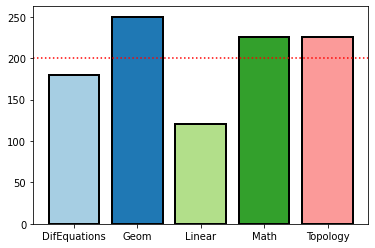

In [30]:
problems =[["DifEquations",  "Geom", "Linear", "Math", "Topology"],
            [180,250,120,225,225]]
from matplotlib import pyplot as plt
# Plot bar chart with data points
plt.bar(problems[0], problems[1],
        color=plt.get_cmap('Paired').colors, edgecolor='k', 
        linewidth=2)
plt.axhline(y = 200, color = 'r', linestyle = 'dotted')
# Display the plot
plt.show()

* a. Observed - Expected
* b.  We square the difference
* c. we divide the squared difference by the expected number:
* d. we add the numbers in the final column to calculate our test statistic:
* e.For the goodness of fit test, this is one fewer than the number of categories

In [31]:
problems =[["DifEquations",  "Geom", "Linear", "Math", "Topology"],
            [180,250,120,225,225]]
problems.append([200,200,200,200,200])
problems

[['DifEquations', 'Geom', 'Linear', 'Math', 'Topology'],
 [180, 250, 120, 225, 225],
 [200, 200, 200, 200, 200]]

In [32]:
Obs_Exp = [a_i - b_i for a_i, b_i in zip(problems[1], problems[2])]
problems.append(Obs_Exp)
problems

[['DifEquations', 'Geom', 'Linear', 'Math', 'Topology'],
 [180, 250, 120, 225, 225],
 [200, 200, 200, 200, 200],
 [-20, 50, -80, 25, 25]]

In [33]:
def turn_to_power(list, power=1): 
    return [number**power for number in list]

SquaraedDifference = turn_to_power(problems[3],2)
problems.append(SquaraedDifference)
problems

[['DifEquations', 'Geom', 'Linear', 'Math', 'Topology'],
 [180, 250, 120, 225, 225],
 [200, 200, 200, 200, 200],
 [-20, 50, -80, 25, 25],
 [400, 2500, 6400, 625, 625]]

In [34]:
SquaraedDifference_div_Expected = [i / j for i, j in zip(problems[4], problems[2])]

problems.append(SquaraedDifference_div_Expected)
problems

[['DifEquations', 'Geom', 'Linear', 'Math', 'Topology'],
 [180, 250, 120, 225, 225],
 [200, 200, 200, 200, 200],
 [-20, 50, -80, 25, 25],
 [400, 2500, 6400, 625, 625],
 [2.0, 12.5, 32.0, 3.125, 3.125]]

In [35]:
problems1 = np.array(problems)
problems1.shape

(6, 5)

In [36]:
sum(problems[5])

52.75

In [37]:
X = problems[1]
n = sum(X)

p = np.repeat(np.array([1/len(X)]), len(X), axis=0)

E = n * p
E

array([200., 200., 200., 200., 200.])

In [38]:
STATISTIC = sum((X - E) ** 2 / E)
STATISTIC

52.75

In [39]:
almost_1 = 1 - 64 * 0.000000001
almost_1

0.999999936

In [40]:
B=2000
nx = len(X)
nx

5

In [41]:
#np.random.choice(nx, size=B*n, replace=True, p=p)
len(np.random.choice(nx, size=B*n, replace=True, p=p))

sm = np.random.choice(nx, size=B*n, replace=True, p=p)
sm

array([0, 1, 3, ..., 3, 1, 0])

In [42]:
# Make it matrix type
sm = np.reshape(sm, (-1, n))
print(sm)

[[0 1 3 ... 2 0 0]
 [4 1 2 ... 0 0 0]
 [4 3 1 ... 4 4 1]
 ...
 [2 1 0 ... 4 0 1]
 [4 4 1 ... 0 0 1]
 [4 0 2 ... 3 1 0]]


In [43]:
sm.shape
#2000 sjyun (irakan), 1000 tox - horizonakan
#|||||

(2000, 1000)

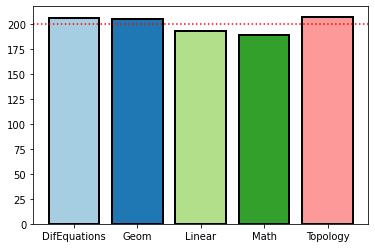

In [44]:
y_for_graph = np.unique(sm[0], return_counts=True)[1]
plt.bar(problems[0], y_for_graph,
        color=plt.get_cmap('Paired').colors, edgecolor='k', 
        linewidth=2)
plt.axhline(y = 200, color = 'r', linestyle = 'dotted')
plt.show()

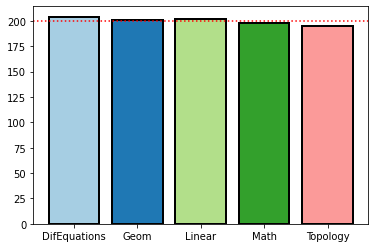

In [45]:
y_for_graph = np.unique(sm[1500], return_counts=True)[1]
plt.bar(problems[0], y_for_graph,
        color=plt.get_cmap('Paired').colors, edgecolor='k', 
        linewidth=2)
plt.axhline(y = 200, color = 'r', linestyle = 'dotted')
plt.show()

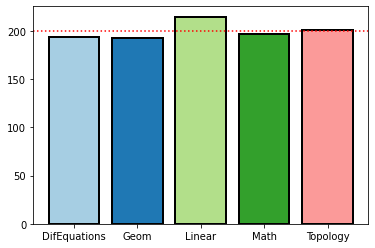

In [46]:
y_for_graph = np.unique(sm[1999], return_counts=True)[1]
plt.bar(problems[0], y_for_graph,
        color=plt.get_cmap('Paired').colors, edgecolor='k', 
        linewidth=2)
plt.axhline(y = 200, color = 'r', linestyle = 'dotted')
plt.show()

In [47]:
counts = np.unique(sm[1500], return_counts=True)[1] 
E/E

array([1., 1., 1., 1., 1.])

In [48]:
def my_func(x, E):
    
    counts = np.unique(x, return_counts=True)[1]    
    
    return  sum((counts - E)**2 / E)

my_func(sm[1], E = E)

3.0199999999999996

In [49]:
#print(my_func(sm, E))
ss = np.apply_along_axis(my_func, 1, sm, E=E) # staca 2000 hat chi squared 

In [50]:
# hashvi bolor ayn depqery vortex sim chi square > mer chi sq
PVAL = (1 + sum(ss >= almost_1 * STATISTIC))/(B + 1)

In [51]:
PVAL

0.0004997501249375312